<a href="https://colab.research.google.com/github/eyaguirat10/CoWin-Breast-Cancer-Detection/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Business Understanding

# Breast Cancer Diagnosis Project

## **Summary**
The project aims to improve breast cancer diagnosis by automating the classification of tumors (benign or malignant) using machine learning algorithms on the Wisconsin Diagnostic Breast Cancer (WDBC) dataset.

---

## **Stakeholders**
- **Oncologists, radiologists, pathologists:** Primary users of predictions.  
- **Hospital IT/data teams:** Responsible for integration, security, and maintenance.  
- **Patients:** Indirect beneficiaries via improved diagnostics.  

---

## **Supervised Learning**

**Business Objective (BO):**  
Develop a reliable, accurate system for breast cancer detection.

**Data Science Objective (DSO):**  
Predict the diagnosis type — **M (Malignant)** or **B (Benign)**.

**Business Success Metrics**  
These metrics require true labels to evaluate prediction performance:  
- **Accuracy:** Overall proportion of correct classifications. **Target ≥ 98%**  
- **Precision:** Reliability of positive (malignant) predictions. **Target ≥ 97%**  
- **F1-Score:** Balances recall and precision, especially with class imbalance. **Target ≥ 97%**  
- **AUC-ROC:** Measures ability to discriminate between classes. **Target ≥ 0.99**

---

## **Unsupervised Learning**

**Business Objective (BO):**  
Identify and group two types of breast cancer cases.

**Data Science Objective (DSO):**  
Cluster and classify diagnosis patterns without predefined labels.

**Business Success Metrics**  
Since labels are not available, success is measured differently:  
- **Silhouette Score:** Measures how well-separated clusters are.  
- **Davies-Bouldin Index / Calinski-Harabasz Index:** Assess cluster compactness and separation.  
- **Domain Interpretability:** Clusters should be medically meaningful (e.g., malignant vs benign enrichment).


#III. Data Understanding 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data=pd.read_csv('C:/Users/User/Desktop/MiniProjetML/CoWin-Breast-Cancer-Detection/Breast Cancer Wisconsin (Diagnostic) Data Set/data.csv')
df=pd.DataFrame(data)



In [21]:
print(f"Dataset Shape: {df.shape}")
print(f"Number of instances: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Dataset Shape: (569, 33)
Number of instances: 569
Number of features: 33
Memory usage: 0.17 MB


In [22]:
print("\nCOLUMN STRUCTURE:")
print(df.info())



COLUMN STRUCTURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimet

In [23]:
df.diagnosis.unique()


array(['M', 'B'], dtype=object)

In [24]:
print("\n TARGET VARIABLE - DIAGNOSIS:")
diagnosis_analysis = df['diagnosis'].value_counts()
print(diagnosis_analysis)



 TARGET VARIABLE - DIAGNOSIS:
diagnosis
B    357
M    212
Name: count, dtype: int64


In [25]:
total = len(df)
malignant_pct = (diagnosis_analysis['M'] / total) * 100
benign_pct = (diagnosis_analysis['B'] / total) * 100

print(f"\nCLASS DISTRIBUTION:")
print(f"Malignant (M): {diagnosis_analysis['M']} cases ({malignant_pct:.2f}%)")
print(f"Benign (B): {diagnosis_analysis['B']} cases ({benign_pct:.2f}%)")
print(f"Class Ratio (B:M): {benign_pct/malignant_pct:.2f}:1")


CLASS DISTRIBUTION:
Malignant (M): 212 cases (37.26%)
Benign (B): 357 cases (62.74%)
Class Ratio (B:M): 1.68:1


In [26]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
print("\n MEAN FEATURES (Primary Measurements):")
mean_descriptions = {
    'radius_mean': 'Mean distances from center to points on perimeter',
    'texture_mean': 'Standard deviation of gray-scale values',
    'perimeter_mean': 'Tumor boundary length',
    'area_mean': 'Total area of tumor',
    'smoothness_mean': 'Local variation in radius lengths',
    'compactness_mean': 'Perimeter² / area - 1.0',
    'concavity_mean': 'Severity of concave portions of contour',
    'concave points_mean': 'Number of concave portions',
    'symmetry_mean': 'Bilateral symmetry',
    'fractal_dimension_mean': '"Coastline approximation" - complexity'
}

for feature, description in mean_descriptions.items():
    print(f"  • {feature}: {description}")


 MEAN FEATURES (Primary Measurements):
  • radius_mean: Mean distances from center to points on perimeter
  • texture_mean: Standard deviation of gray-scale values
  • perimeter_mean: Tumor boundary length
  • area_mean: Total area of tumor
  • smoothness_mean: Local variation in radius lengths
  • compactness_mean: Perimeter² / area - 1.0
  • concavity_mean: Severity of concave portions of contour
  • concave points_mean: Number of concave portions
  • symmetry_mean: Bilateral symmetry
  • fractal_dimension_mean: "Coastline approximation" - complexity


In [28]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


** “Unnamed: 32” column**  
This column contains only NaN values and should be removed from the dataset.

In [29]:
missing_values = df.isnull().sum()
print(missing_values)
total_missing = missing_values.sum()
print(f"Missing Values: {total_missing} ({total_missing/df.size*100:.4f}% of total data)")

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [30]:
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

Duplicate Rows: 0


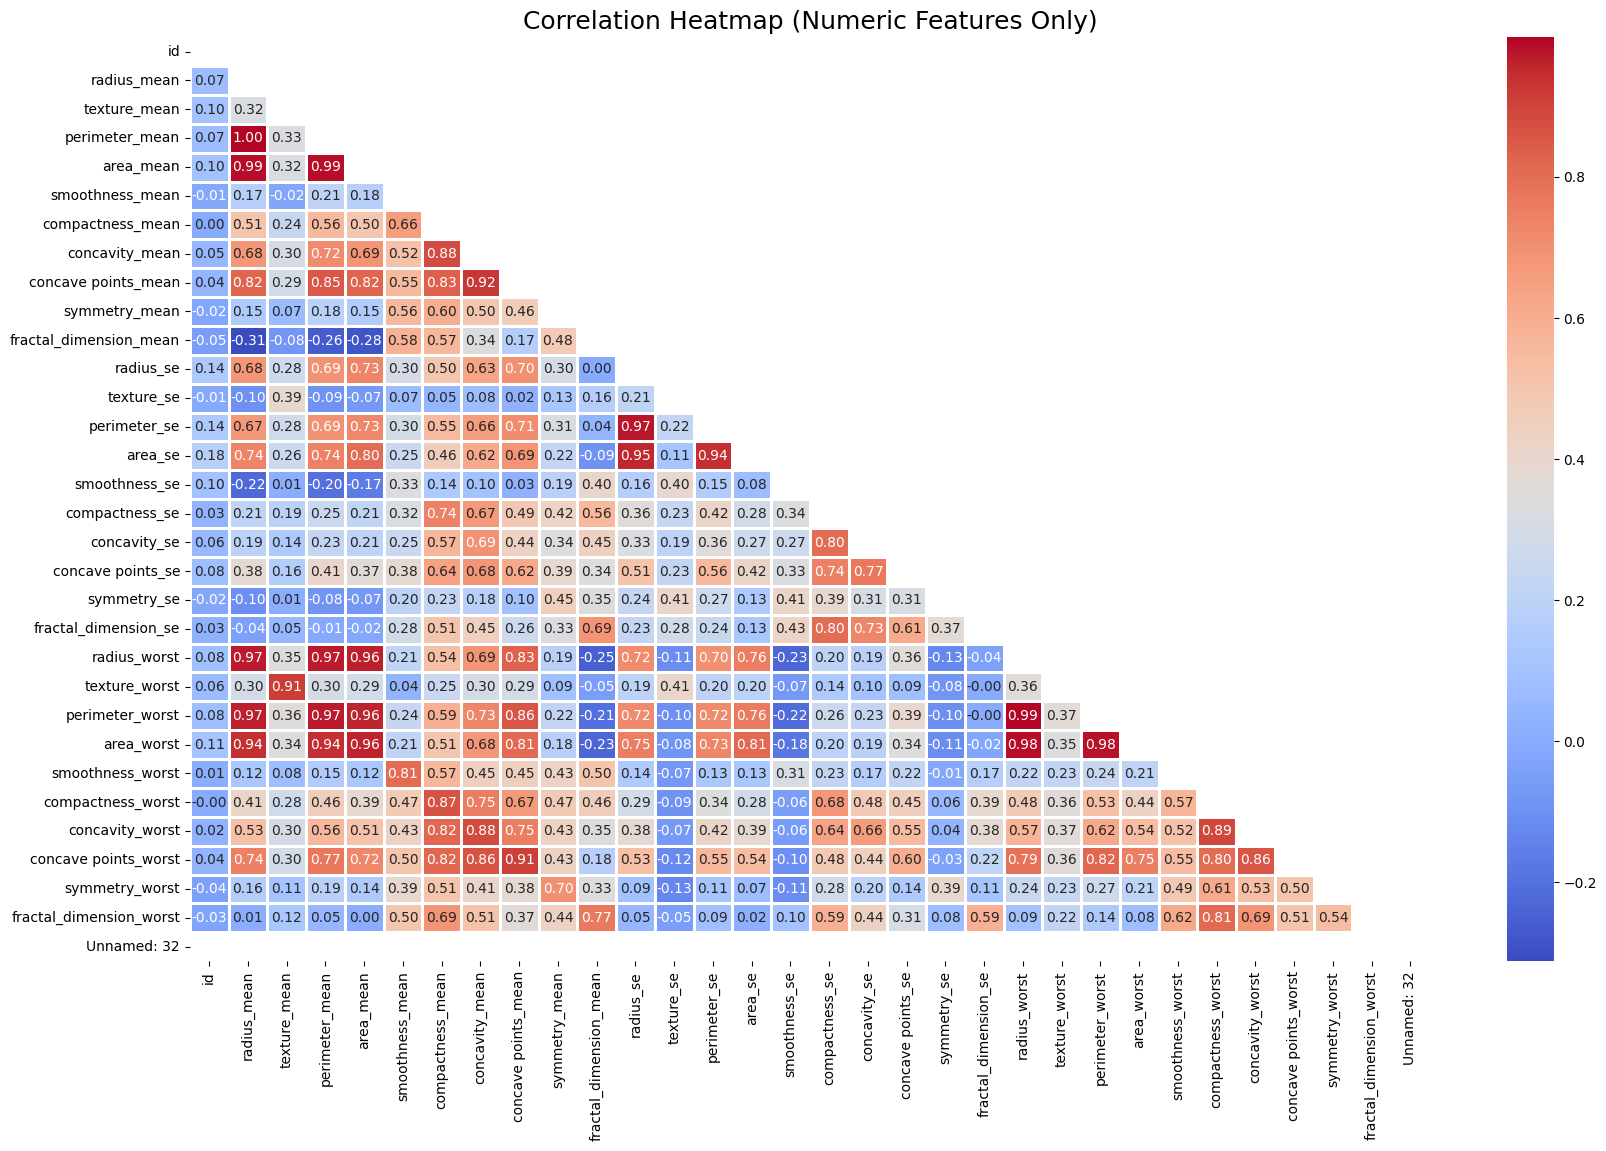

In [31]:
plt.figure(figsize=(20, 12))

# Compute correlation only on numeric columns
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# Create mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot
sns.heatmap(
    corr,
    mask=mask,
    linewidths=1,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=18)
plt.show()


**The heatmap shows strong positive correlations among size-related features (radius, perimeter, area) and among shape-irregularity features (concavity, compactness, concave points) ==> capture similar tumor characteristics.**


**Features like fractal_dimension and several Stabdard Error measurements have weak correlations, meaning they provide more independent and unique information.**


In [32]:
# Outlier detection function (IQR)
def detect_outliers_iqr(feature_series):
    Q1 = feature_series.quantile(0.25)
    Q3 = feature_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = feature_series[(feature_series < lower_bound) | (feature_series > upper_bound)]
    return len(outliers)

print("Outlier count per feature (IQR method):\n")

outlier_summary = {}

for feature in df.columns:
    # Skip non-numeric columns
    if not pd.api.types.is_numeric_dtype(df[feature]):
        print(f"{feature:20s}: SKIPPED (non-numeric)")
        continue
    
    outlier_count = detect_outliers_iqr(df[feature])
    outlier_percentage = (outlier_count / len(df)) * 100
    outlier_summary[feature] = outlier_count
    
    print(f"{feature:20s}: {outlier_count:3d} outliers ({outlier_percentage:5.2f}%)")

print("\nTotal numeric features processed:", len(outlier_summary))
print("Total outlier instances across all numeric features:", sum(outlier_summary.values()))


Outlier count per feature (IQR method):

id                  :  81 outliers (14.24%)
diagnosis           : SKIPPED (non-numeric)
radius_mean         :  14 outliers ( 2.46%)
texture_mean        :   7 outliers ( 1.23%)
perimeter_mean      :  13 outliers ( 2.28%)
area_mean           :  25 outliers ( 4.39%)
smoothness_mean     :   6 outliers ( 1.05%)
compactness_mean    :  16 outliers ( 2.81%)
concavity_mean      :  18 outliers ( 3.16%)
concave points_mean :  10 outliers ( 1.76%)
symmetry_mean       :  15 outliers ( 2.64%)
fractal_dimension_mean:  15 outliers ( 2.64%)
radius_se           :  38 outliers ( 6.68%)
texture_se          :  20 outliers ( 3.51%)
perimeter_se        :  38 outliers ( 6.68%)
area_se             :  65 outliers (11.42%)
smoothness_se       :  30 outliers ( 5.27%)
compactness_se      :  28 outliers ( 4.92%)
concavity_se        :  22 outliers ( 3.87%)
concave points_se   :  19 outliers ( 3.34%)
symmetry_se         :  27 outliers ( 4.75%)
fractal_dimension_se:  28 outlier

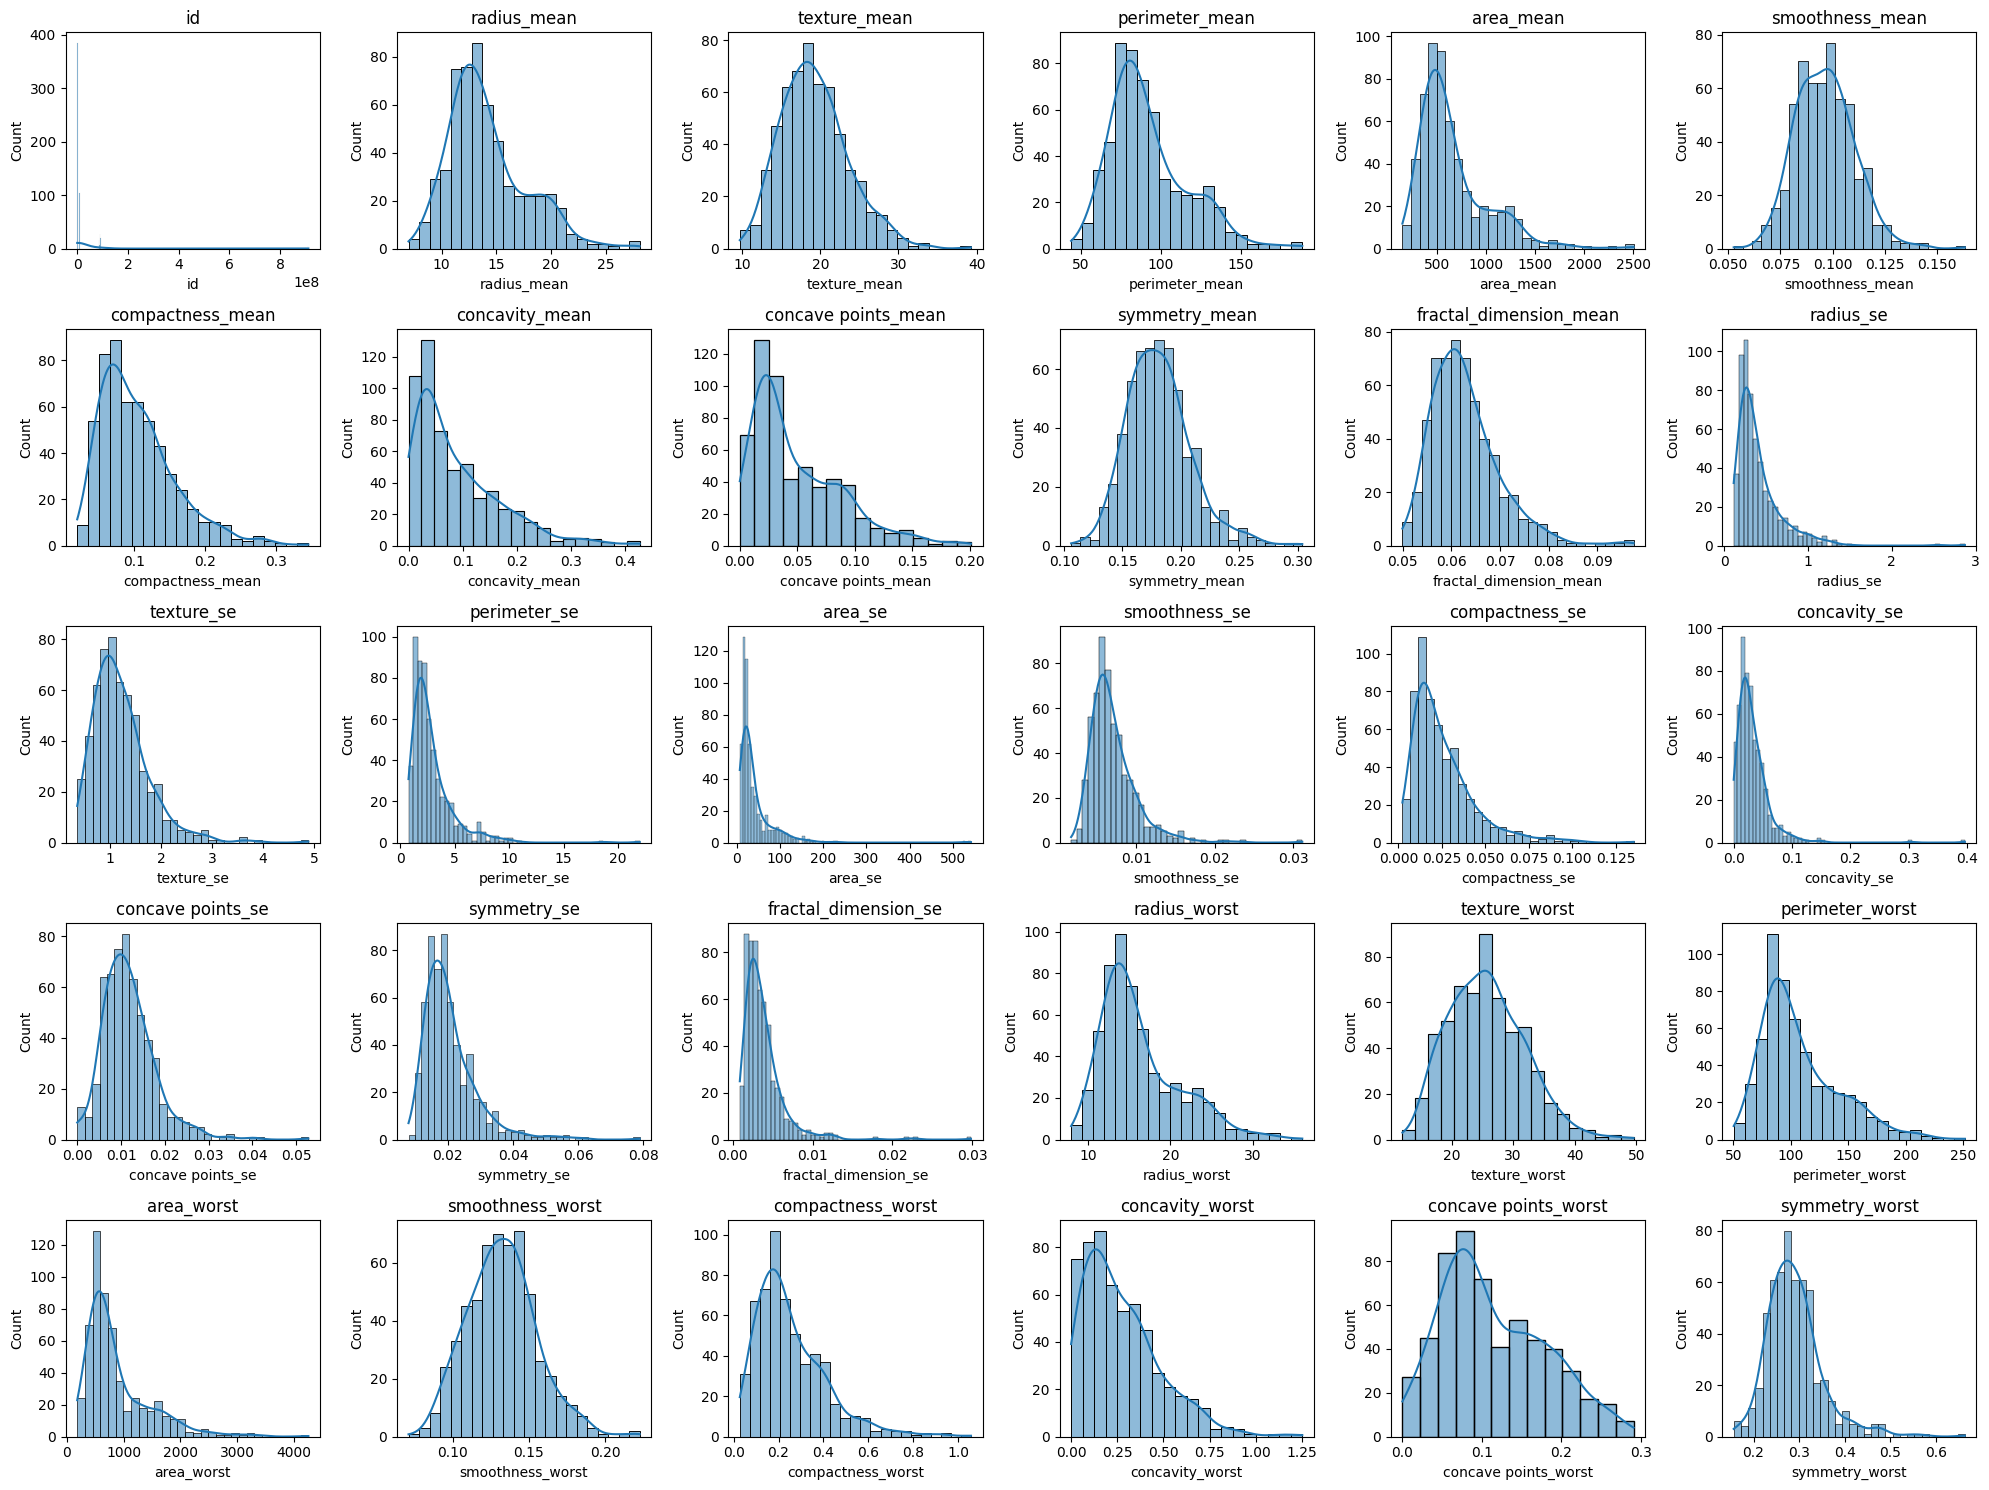

In [33]:
plt.figure(figsize=(20, 15))
plotnumber = 1

numeric_df = df.select_dtypes(include=[np.number])

for column in numeric_df.columns:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column], kde=True, ax=ax)
        ax.set_xlabel(column)
        ax.set_title(column)
        plotnumber += 1

plt.tight_layout()
plt.show()


#V Data Preparation

In [34]:

#suppression de Unnamed: 32  et id
df.drop(columns=['Unnamed: 32', 'id'], inplace=True, errors='ignore')
df.columns
     

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [37]:

# matrice de correllation les variables avec la target
# creation de diagnosis numerique
df_features = df.drop(columns=['diagnosis'])
df['diagnosis_num'] = df['diagnosis'].map({'M':1, 'B':0})
df_features['diagnosis_num'] = df['diagnosis'].map({'M':1, 'B':0})
df_features.corr()['diagnosis_num'].sort_values(ascending=False)

diagnosis_num              1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [38]:
from sklearn.preprocessing import StandardScaler

y = df['diagnosis_num']
# Features (toutes les colonnes numériques sauf diagnosis)
X = df.drop(columns=['diagnosis', 'diagnosis_num'])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir en DataFrame pour garder les noms des colonnes
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


#IV. Modeling

#V. Evaluation

#VI. Deployment